# Demonstration
---
### [Warning] Change the path to yours!
If you don't have 1. dataset 2. saved model, you have to download and train model first!
the dataset can be download from [link](http://www.cvlibs.net/datasets/kitti/eval_road.php)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import torch
from matplotlib import pyplot
import os 
import numpy as np
from torch.utils.data import Dataset, DataLoader
from data_helper import (MyDataset, findmax)
from FCN import FCN
from labelmap import label_map
from validate import iu
from draw import (paint_grid, direct_render)

In [2]:
batch_size, n_class, h, w = 10, 2, 224, 320
image_shape = (h, w, 3)
# please download dataset and training the model first
home = os.path.expanduser('~')
data_dir = os.path.join(home, 'workspace', 'deeplearning', 'dataset', 'kitti', 'data_road')
saved_model_dir = os.path.join(home, 'workspace', 'deeplearning', 'FCN', 'saved', 'FCNs_new.pth')
own_state_dict = torch.load(saved_model_dir)

myTestDataset = MyDataset(data_dir, image_shape=image_shape, isTrain=True, n_class=n_class)
myTestDataLoader = DataLoader(myTestDataset, batch_size=batch_size, shuffle=True)

_test_batch = next(iter(myTestDataLoader))

In [3]:
fcn = FCN(n_class=2)
fcn.load_state_dict(own_state_dict)

In [4]:
_X = _test_batch['X']
_Y = _test_batch['Y']
predict = fcn(_X)
predict_map = findmax(predict, n_class)

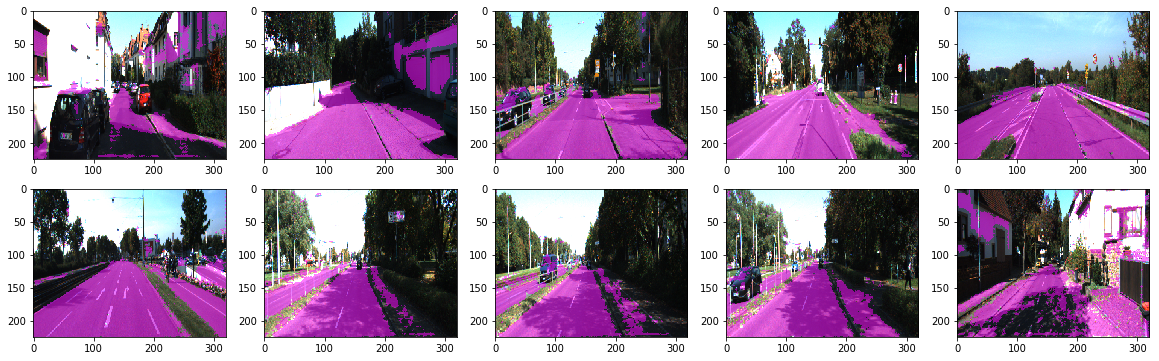

In [5]:
paint_grid(_X, predict_map, n_class=n_class, col=5, opacity=0.5, figsize=(20, 6))

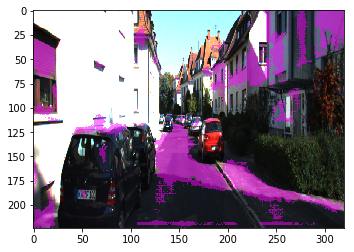

In [6]:
_test = direct_render(_X, predict)
pyplot.figure()
pyplot.imshow(_test[0])
pyplot.draw()

In [7]:
# IU
values, means = iu(predict_map, _Y.data.cpu().numpy())
print(means)

[0.09251073 0.24384651 0.2678385  0.40006926 0.29771139 0.34203472
 0.32171687 0.32023445 0.31124163 0.09472817]


#### personnal record
Rename keys in state_dict()
```
own_state_dict = torch.load(os.path.join('saved', 'FCNs.pth'))
_own_state_dict = {k.replace('.features.', '.'): v for k, v in own_state_dict.items() if k in own_state_dict}
```